# <center> <span style="color:Magenta">Programacion 2</span> </center>
<center> <span style="color:Pink">  Challenge 1: Project Cancer Detection </span>  </center>
<center> <span style="color:Pink"> Ilse Arredondo Reyes. No. Alumno 323019078</span>  </center>

### Project Stages  

**Stage 1: Download Dataset**  

🔹 **Dataset Information**  

This endpoint will receive as input:  
- **Attribute**  
- **Domain**  

---

**Stage 2: Model Creation**

🔹 **Preprocessing** 

This endpoint will receive the dataset as input and transform it into a DataFrame.  

- **Data values and counts**
- **Nulls and others characters**
- **Data normalization**

🔹 **Models**

This endpoint will receive as input parameters

- **Construction models**
- **End Date (date time)**
- **Taring model**
- **Cross validation**
- **Test model**

🔹 **Metrics**
- **Precision**
- **Recall**
- **F1-Scores**
- **Confusion Matrix**
- **ROC**

---

**Stage 3: Create a pipeline to MLOps**
● **The MLOps part will be done with mlflow performing the following tasks**
- **Log metrics**
- **Model signatures**
- **Save the plot and log it as an artifact**
- **Tracking url (localhost)**
- **Run MLOps**



In [1]:
# Import data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

In [2]:
raw_data = pd.read_csv(r'C:\Users\ilse-\MCD\2DO SEMESTRE\Programacion-2\datasets\breast-cancer-wisconsin.data.csv')
raw_data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


### Preprocessing

- Data info
- Data describe
- Data values and counts
- Nulls and others characters
- Data normalization

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
for col in raw_data.columns:
    print(f"\nColumn: {col}")
    print(raw_data[col].value_counts())


Column: id
id
92751       1
842302      1
842517      1
84300903    1
84348301    1
           ..
846381      1
846226      1
84610002    1
845636      1
84501001    1
Name: count, Length: 569, dtype: int64

Column: diagnosis
diagnosis
B    357
M    212
Name: count, dtype: int64

Column: radius_mean
radius_mean
12.340    4
11.060    3
10.260    3
12.770    3
13.050    3
         ..
19.810    1
13.540    1
13.080    1
9.504     1
15.340    1
Name: count, Length: 456, dtype: int64

Column: texture_mean
texture_mean
16.84    3
19.83    3
15.70    3
20.52    3
18.22    3
        ..
27.88    1
22.68    1
23.93    1
29.37    1
30.62    1
Name: count, Length: 479, dtype: int64

Column: perimeter_mean
perimeter_mean
82.61     3
134.70    3
87.76     3
129.10    2
82.69     2
         ..
142.00    1
131.20    1
108.30    1
140.10    1
68.89     1
Name: count, Length: 522, dtype: int64

Column: area_mean
area_mean
512.2     3
394.1     2
399.8     2
1076.0    2
582.7     2
         ..
1479.0   

In [6]:
# Cuantos valores null tenemos ? 
print(f"Podemos visualizar el total de NaN por columna \n{raw_data.isna().sum()}")
print(f"Tambien podemos ver el total de NaN en suma cumulativa = {raw_data.isna().sum().sum()}")

Podemos visualizar el total de NaN por columna 
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst        

In [7]:
raw = raw_data.drop(columns=["id", "Unnamed: 32"])

In [8]:
raw["diagnosis"] = LabelEncoder().fit_transform(raw["diagnosis"])

Estandarizacion

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
raw_data = raw_data.drop(columns="id")
data_numeric = raw_data.select_dtypes(exclude=['object'])
data = raw_data.copy(deep=True)
data[data_numeric.columns] = scaler.fit_transform(data_numeric.values)
data

c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,NaN
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,NaN
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,NaN
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,NaN


### Models

- ✓ Construction models
- ✓ Training model
- ✓ Cross validation
- ✓ Test model

In [14]:
# Import different methods to construct a model
from sklearn import metrics
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import os
working_dir = os.getcwd()
from mlflow.models import infer_signature

In [15]:
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [18]:
from sklearn.model_selection import train_test_split

# Define las variables predictoras y objetivo
prediction_var = [col for col in data.columns if col != "diagnosis"]
outcome_var = "diagnosis"

# Separar features y etiqueta
X = data[prediction_var]
y = data[outcome_var]

# Opcional: Imputar NaNs si los hay
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# División en entrenamiento y prueba
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import mlflow
import mlflow.sklearn

# Entrenar el modelo
model = RandomForestClassifier()
model.fit(train_X, train_y)

# Predecir
predictions = model.predict(test_X)

# Calcular accuracy
acc = accuracy_score(test_y, predictions)

# Configurar MLflow y registrar
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment(experiment_name="First Random Forest Classifier")

with mlflow.start_run(run_name="proyect_cancer"):
    mlflow.set_tag("Cancer_Challenge", "Basic FRC model")
    mlflow.log_metric("accuracy", acc)
    
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="RandomForestClassifier",
        input_example=train_X,
        registered_model_name="RandomForestClassifier",
    )


Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2025/05/18 08:38:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 5


🏃 View run proyect_cancer at: http://127.0.0.1:5000/#/experiments/710634965685763325/runs/9f4c10738bd94988ae79106f6019408b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/710634965685763325


Created version '5' of model 'RandomForestClassifier'.


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import mlflow
import mlflow.sklearn

# Definir parámetros del modelo
params = {"n_estimators": 100}
model = RandomForestClassifier(**params)
model.fit(train_X, train_y)

# Hacer predicciones
prediction = model.predict(test_X)

# Calcular métrica
acc = metrics.accuracy_score(test_y, prediction)

# Definir nombre del experimento y ejecución
run_name = "proyect_cancer"
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment(experiment_name="First Random Forest Classifier")

# Registrar modelo en MLflow
with mlflow.start_run(run_name=run_name):
    mlflow.set_tag("Cancer_Challenge", "Basic FRC model")
    mlflow.log_metric("accuracy", acc)
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="RandomForestClassifier",
        input_example=train_X,
        registered_model_name="RandomForestClassifier",
    )

print("Accuracy:", acc)


Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2025/05/18 08:39:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 6


🏃 View run proyect_cancer at: http://127.0.0.1:5000/#/experiments/710634965685763325/runs/b22751fdf70043b89f3081157f3fa84c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/710634965685763325
Accuracy: 0.9649122807017544


Created version '6' of model 'RandomForestClassifier'.


Diferentes modelos

In [22]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000") 

In [23]:
def classification_model(model, data, prediction_input, output):
    """
    Funcion que toma un modelo de scikit learn y lo entrena y 
    valida utilizando KFold Validation.
    """
    X_train, X_test, y_train, y_test = train_test_split(data[prediction_input], data[output], test_size = 0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, pos_label="B")
    recall = metrics.recall_score(y_test, y_pred, pos_label="B")
    f1 = metrics.f1_score(y_test, y_pred, pos_label="B")
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    model_metrics = {
        "accuracy" : accuracy,
        "precision" : precision,
        "recall" : recall,
        "f1" : f1
    }
 
    
    kf = KFold()
    kf = kf.split(data[prediction_input])
    error = []
    for i, (train, test) in enumerate(kf):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
    
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    return model, model_metrics

In [24]:
def log_model_into_mlflow(model_name, run_name, model, model_metrics):
    with mlflow.start_run(run_name=run_name):
        unique_name = f"{model_name}-{run_name}"
        exp = mlflow.set_experiment(experiment_name="CancerChallenge")
        mlflow.set_tag("Cancer_Challenge", "Basic model")
        mlflow.log_metrics(model_metrics)
        model_info = mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=unique_name,
            input_example=train_X,
            registered_model_name=unique_name,
        )

In [25]:
model = DecisionTreeClassifier()
outcome_var= "diagnosis"
model, model_metrics = classification_model(model,data,prediction_var,outcome_var)
log_model_into_mlflow(
    model_name="DecisionTreeClassifier",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)

Accuracy : 92.982%
Cross-Validation Score : 88.596%
Cross-Validation Score : 89.474%
Cross-Validation Score : 90.936%
Cross-Validation Score : 91.447%
Cross-Validation Score : 89.795%


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
2025/05/18 08:39:36 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('X has 30 features, but DecisionTreeClassifier is expecting 31 features as input.'). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
2025/05/18 08:39:40 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    [
      -0.1099963521831069,
      -0.3210534684733675,
      -0.15854245613848164,
      -0.19877178247173855,
    

🏃 View run proyect_cancer at: http://127.0.0.1:5000/#/experiments/710634965685763325/runs/38d5a9f2b5fa47d3866a9d59b10e4981
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/710634965685763325


Created version '3' of model 'DecisionTreeClassifier-proyect_cancer'.


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import svm

# Crear pipeline con imputación + modelo
model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Puedes cambiar 'mean' por 'median', 'most_frequent', etc.
    ('svc', svm.SVC())
])

# Entrenar modelo y registrar en MLflow
model, model_metrics = classification_model(model, data, prediction_var, outcome_var)

log_model_into_mlflow(
    model_name="SVC",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed fo

Accuracy : 99.415%
Cross-Validation Score : 94.737%
Cross-Validation Score : 95.614%
Cross-Validation Score : 96.199%
Cross-Validation Score : 96.930%
Cross-Validation Score : 97.013%


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
2025/05/18 08:39:48 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    [
      -0.1099963521831069,
      -0.3210534684733675,
      -0.15854245613848164,
      -0.19877178247173855,
      -1.2041392891948668,
      -0.7690696862078457,
      -0.7531641265127333,
      -0.9190175589401239,
      -1.2362774486667578,
      -0.9919840104671376,
      -0.5600485402107402,
      -0.8336065214744485,
      -0.6401038986385649,
      -0.41510799580155733,
      -1.4010497746986432,
      -0.5341999776013769,
      -0.4673056761364055,
      -0.9680895202729054,
      -0.8780974824183547,
      -0.6880028286217408,
      -0.19241897601680918,
      -0.5239048236098285,
      -0.29997951281574164,
      -0.27191943742694225,
      -1.54559189671747

🏃 View run proyect_cancer at: http://127.0.0.1:5000/#/experiments/972731160020084138/runs/95f26f7b7fe945aba5b8fbb58b5a5d87
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972731160020084138


Created version '3' of model 'SVC-proyect_cancer'.


In [27]:
# Crear pipeline con imputación + modelo
model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Puedes cambiar 'mean' por 'median', etc.
    ('knn', KNeighborsClassifier())
])

# Entrenar modelo y registrar en MLflow
model, model_metrics = classification_model(model, data, prediction_var, outcome_var)

log_model_into_mlflow(
    model_name="KNeighborsClassifier",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)

c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Accuracy : 97.661%
Cross-Validation Score : 92.982%
Cross-Validation Score : 94.298%
Cross-Validation Score : 95.029%
Cross-Validation Score : 95.833%
Cross-Validation Score : 95.959%


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed fo

🏃 View run proyect_cancer at: http://127.0.0.1:5000/#/experiments/972731160020084138/runs/53afdc2a1d104d4395428408b20d1f0b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972731160020084138


Created version '3' of model 'KNeighborsClassifier-proyect_cancer'.


In [28]:
model = RandomForestClassifier(n_estimators=100)
model, model_metrics = classification_model(model,data,prediction_var,outcome_var)
log_model_into_mlflow(
    model_name="RandomForestClassifier",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)

Accuracy : 94.152%
Cross-Validation Score : 90.351%
Cross-Validation Score : 92.544%
Cross-Validation Score : 94.444%
Cross-Validation Score : 94.737%


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
2025/05/18 08:40:11 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('X has 30 features, but RandomForestClassifier is expecting 31 features as input.'). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.


Cross-Validation Score : 95.435%


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
2025/05/18 08:40:15 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    [
      -0.1099963521831069,
      -0.3210534684733675,
      -0.15854245613848164,
      -0.19877178247173855,
      -1.2041392891948668,
      -0.7690696862078457,
      -0.7531641265127333,
      -0.9190175589401239,
      -1.2362774486667578,
      -0.9919840104671376,
      -0.5600485402107402,
      -0.8336065214744485,
      -0.6401038986385649,
      -0.41510799580155733,
      -1.4010497746986432,
      -0.5341999776013769,
      -0.4673056761364055,
      -0.9680895202729054,
      -0.8780974824183547,
      -0.6880028286217408,
      -0.19241897601680918,
      -0.5239048236098285,
      -0.29997951281574164,
      -0.27191943742694225,
      -1.54559

🏃 View run proyect_cancer at: http://127.0.0.1:5000/#/experiments/972731160020084138/runs/e234d0d3c40f4c0e9a2be986eb0e23f4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972731160020084138


Created version '3' of model 'RandomForestClassifier-proyect_cancer'.


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Crear pipeline: imputación + modelo
model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # puedes cambiar 'mean' por 'median' si prefieres
    ('logreg', LogisticRegression(max_iter=1000))  # max_iter aumentado para evitar warning de convergencia
])

# Entrenar modelo y registrar métricas
model, model_metrics = classification_model(model, data, prediction_var, outcome_var)

log_model_into_mlflow(
    model_name="LogisticRegression",
    run_name=run_name,
    model=model,
    model_metrics=model_metrics
)

c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed fo

Accuracy : 96.491%
Cross-Validation Score : 97.368%
Cross-Validation Score : 96.491%
Cross-Validation Score : 96.784%
Cross-Validation Score : 97.149%
Cross-Validation Score : 97.542%


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
2025/05/18 08:40:25 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    [
      -0.1099963521831069,
      -0.3210534684733675,
      -0.15854245613848164,
      -0.19877178247173855,
      -1.2041392891948668,
      -0.7690696862078457,
      -0.7531641265127333,
      -0.9190175589401239,
      -1.2362774486667578,
      -0.9919840104671376,
      -0.5600485402107402,
      -0.8336065214744485,
      -0.6401038986385649,
      -0.41510799580155733,
      -1.4010497746986432,
      -0.5341999776013769,
      -0.4673056761364055,
      -0.9680895202729054,
      -0.8780974824183547,
      -0.6880028286217408,
      -0.19241897601680918,
      -0.5239048236098285,
      -0.29997951281574164,
      -0.27191943742694225,
      -1.54559189671747

🏃 View run proyect_cancer at: http://127.0.0.1:5000/#/experiments/972731160020084138/runs/485818a24e814a9582e624635c9bad89
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972731160020084138


Created version '2' of model 'LogisticRegression-proyect_cancer'.


### Metrics

- ✓ Precision
- ✓ Recall
- ✓ F1-Scores
- ✓ Confusion Matrix
- ✓ ROC

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Separar dataset
train, test = train_test_split(data, test_size=0.3, random_state=42)
prediction_var = [c for c in data.columns if c != "diagnosis"]

train_X = train[prediction_var]
train_y = train["diagnosis"]

test_X = test[prediction_var]
test_y = test["diagnosis"]

# Crear pipeline con imputación y modelo
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # o "median"
    ("logreg", LogisticRegression(max_iter=1000))
])

# Entrenar
pipeline.fit(train_X, train_y)

# Predecir
pred_y = pipeline.predict(test_X)

# Evaluar (¡ojo al orden de los parámetros!)
precision = metrics.precision_score(test_y, pred_y, pos_label="B")
recall = metrics.recall_score(test_y, pred_y, pos_label="B")
f1 = metrics.f1_score(test_y, pred_y, pos_label="B")

# Mostrar resultados
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.9907
Recall: 0.9815
F1 Score: 0.9860


c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


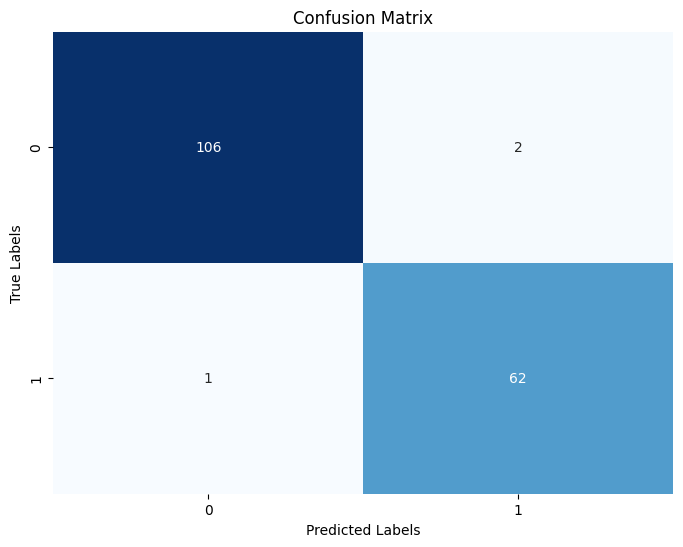

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ilse-\anaconda3\envs\PROGRAMACION2\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


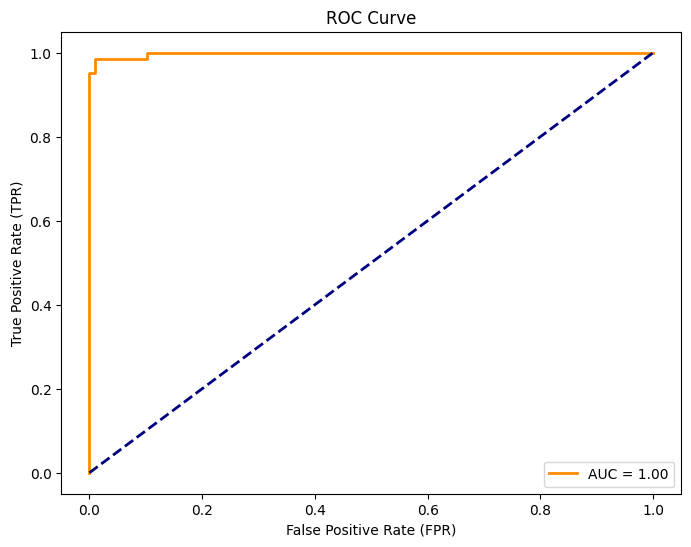

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Supongamos que train_X, train_y, test_X, test_y ya están definidos y contienen NaNs

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("logreg", LogisticRegression(max_iter=1000))
])

pipeline.fit(train_X, train_y)

# Obtener scores probabilísticos para la clase positiva ("M" o "B" según tu dataset)
# Primero, convierte test_y a binario para la curva ROC:
roc_test_y = [1 if y == "M" else 0 for y in test_y]

# Obtener la probabilidad de la clase positiva (ajusta según tu clase positiva)
# Aquí asumo que la clase positiva es "M"
y_scores = pipeline.predict_proba(test_X)[:, pipeline.classes_.tolist().index("M")]

# Calcular curvas ROC
fpr, tpr, thresholds = roc_curve(y_true=roc_test_y, y_score=y_scores)

roc_auc = auc(fpr, tpr)

# Graficar ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
